# **Car Price Prediction**

**Mục tiêu:**
Xây dựng Pipeline học máy truyền thống cho vấn đề trên.

1.  **EDA (Exploratory Data Analysis):**
    *   Thống kê mô tả dữ liệu, trực quan hóa để hiểu rõ các biến.
    *   Phát hiện dữ liệu thiếu, giá trị ngoại lai và xu hướng phân phối.

2.  **Tiền xử lý dữ liệu (Data Preprocessing):**
    *   Làm sạch dữ liệu, xử lý các giá trị bị thiếu.
    *   Mã hóa dữ liệu phân loại (One-Hot Encoding, Label Encoding).
    *   Chuẩn hóa dữ liệu số (StandardScaler, MinMaxScaler).
    *   Chia tập dữ liệu thành tập huấn luyện (train) và tập kiểm tra (test).

3.  **Trích xuất và lựa chọn đặc trưng (Feature Engineering & Selection):**
    *   Tạo ra các đặc trưng mới có ý nghĩa hơn từ dữ liệu gốc (ví dụ: tuổi của xe).
    *   Lựa chọn những đặc trưng quan trọng nhất để đưa vào mô hình.

4.  **Huấn luyện mô hình (Model Training):**
    *   Áp dụng các thuật toán học máy phù hợp cho bài toán **hồi quy (regression)** như:
        *   Logistic Regression
        *   SVM
        *   Random Forest

5.  **Đánh giá mô hình (Model Evaluation):**
    *   Sử dụng các chỉ số đánh giá cho bài toán hồi quy:
        *   Accuracy
        *   Precision
        *   Recall
        *   F1-score

**Yêu cầu:**
* Các nhóm không được chọn trùng tập dữ liệu.
* Tập dữ liệu phải có missing value để sinh viên thực hành kỹ thuật imputation.
* Tập dữ liệu phải có categorical value để sinh viên thực hành các kỹ thuật
encoding.
* Số lượng mẫu (sample size) đủ lớn để pipeline có ý nghĩa; việc lựa chọn cụ thể
nên được thảo luận trực tiếp với giảng viên trên lớp.

**Nhiệm vụ:** mỗi nhóm phải xây dựng một pipeline học máy truyền thống cho
dữ liệu dạng bảng. Pipeline này phải được thiết kế sao cho cho phép cấu hình các kỹ
thuật và tham số ở từng bước. Ví dụ:
* Scaling: có thể lựa chọn MinMaxScaler hoặc StandardScaler; nếu chọn MinMaxScaler,
sinh viên cần cấu hình feature_range.
* Giảm số chiều: có thể lựa chọn PCA với các mức giữ lại phương sai khác nhau
(90%, 95%, ...).
* Mô hình: có thể lựa chọn Logistic Regression, SVM, Random Forest và so sánh
kết quả.

Kết quả cuối cùng cần bao gồm: báo cáo phân tích EDA, mô tả pipeline, các tham
số đã thử nghiệm, và so sánh hiệu quả giữa các cấu hình.

## **1. Thiết lập môi trường và Tải dữ liệu**



### **1.1 Import thư viện và cấu hình Kaggle API từ Secrets**

In [10]:
import os
import pandas as pd
from google.colab import userdata
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
print("Các thư viện đã được import và cấu hình.")

# Tự động cấu hình Kaggle API
os.environ['KAGGLE_USERNAME'] = 'nguyenk512'
os.environ['KAGGLE_KEY'] = '187454a718c857637f7319f39e33b509'

Các thư viện đã được import và cấu hình.


### **1.2 Tải, giải nén và đọc dữ liệu**

In [3]:
!pip install kaggle --quiet
!kaggle datasets download -d deepcontractor/car-price-prediction-challenge -p ./data

# Thêm cờ -o để tự động ghi đè file cũ, tránh bị hỏi và gây lỗi
!unzip -o -q ./data/car-price-prediction-challenge.zip -d ./data

# Đọc file 'train.csv' (đây là file dữ liệu huấn luyện)
try:
    df = pd.read_csv('./data/car_price_prediction.csv')
    print("\nĐọc dataset thành công!")
except FileNotFoundError:
    print("\nLỗi: Không tìm thấy dataset. Vui lòng kiểm tra lại kết quả lệnh 'ls' ở trên.")

Dataset URL: https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge
License(s): CC0-1.0
  0% 0.00/429k [00:00<?, ?B/s]
100% 429k/429k [00:00<00:00, 685MB/s]

Đọc dataset thành công!


## **2. EDA (Exploratory Data Analysis)**

### **2.1 Xem thông tin tổng quan (kiểu dữ liệu, số lượng giá trị không rỗng)**

In [4]:
print("\nThông tin tổng quan về các cột:")
df.info()


Thông tin tổng quan về các cột:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color  

### **2.2 Thống kê mô tả và kiểm tra dữ liệu thiếu**

Trong phần này, chúng ta sẽ đi sâu vào việc phân tích từng cột:
1.  **Thống kê mô tả:** Sử dụng `describe()` để xem các giá trị như trung bình, độ lệch chuẩn, min, max cho các cột số và tần suất cho các cột phân loại.
2.  **Kiểm tra giá trị thiếu (Missing Values):** Phát hiện và trực quan hóa số lượng cũng như tỷ lệ các giá trị bị thiếu. Dựa trên hình ảnh, cột `Levy` có giá trị `'-'` cần được xử lý như một giá trị thiếu.

#### **2.2.1 Phân tích các biến số (Numerical Variables)**

Chúng ta sẽ xem xét phân phối và các giá trị ngoại lai của từng cột dữ liệu dạng số. Mỗi cột sẽ có một cặp biểu đồ:
*   **Histogram:** Cho thấy hình dạng phân phối của dữ liệu.
*   **Boxplot:** Giúp nhanh chóng xác định các giá trị ngoại lai (outliers).

--- Phân phối của các biến số ---


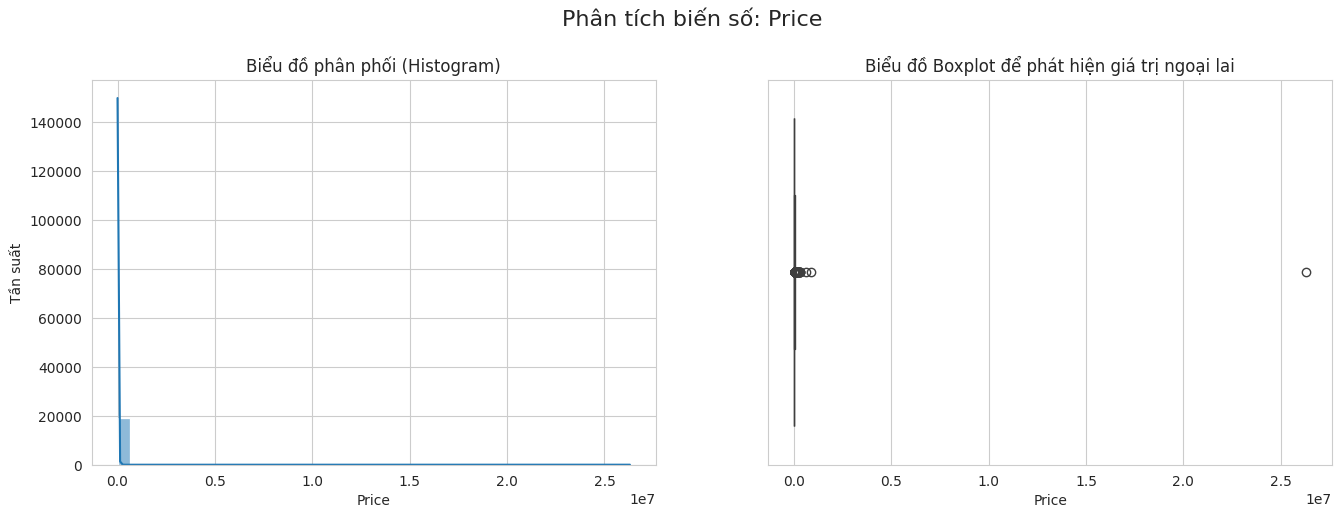

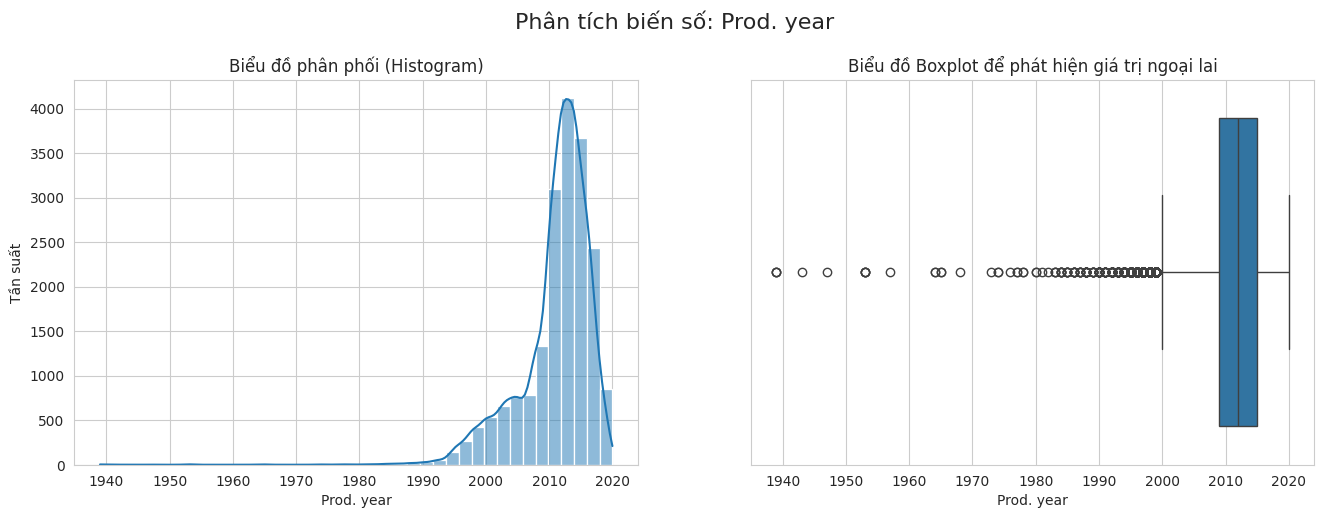

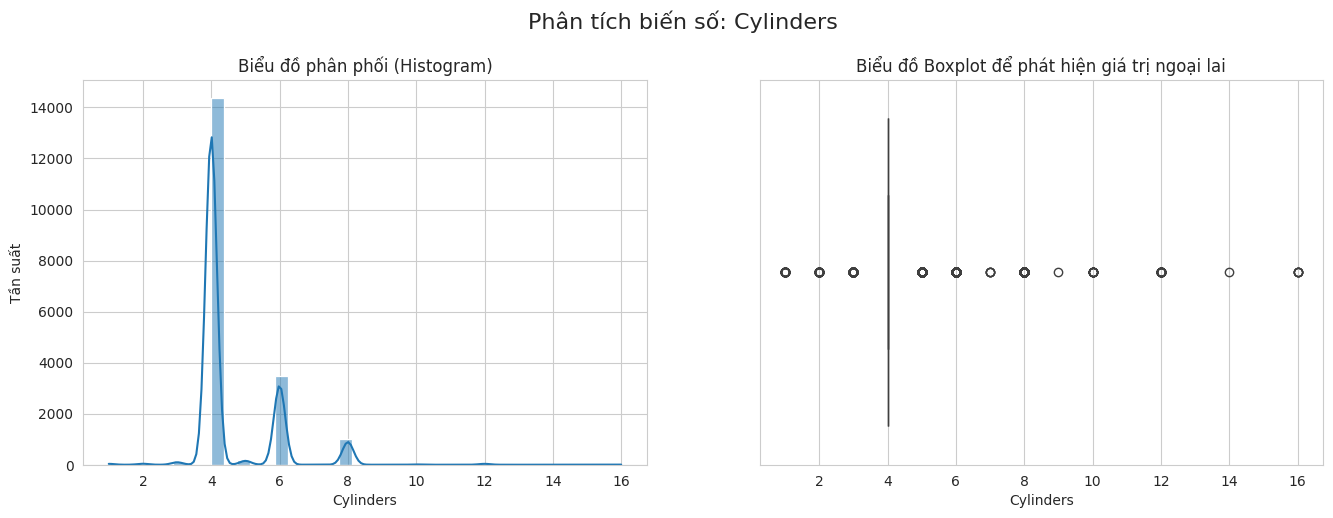

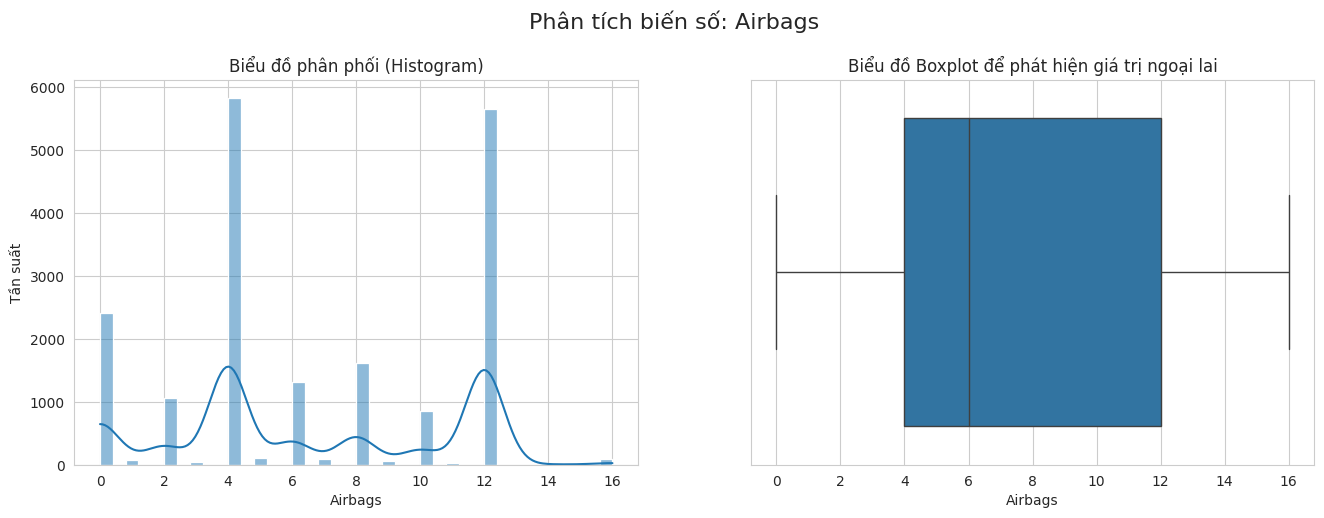

In [5]:
# Lấy danh sách các cột dạng số (loại bỏ cột ID vì không có ý nghĩa thống kê)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('ID')

print("--- Phân phối của các biến số ---")

# Lặp qua từng cột số để vẽ biểu đồ
for col in numerical_cols:
    # Tạo một figure mới cho mỗi cột để chúng không bị vẽ đè lên nhau
    plt.figure(figsize=(16, 5))
    plt.suptitle(f'Phân tích biến số: {col}', fontsize=16, y=1.02)

    # 1. Biểu đồ Histogram (phân phối)
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=40)
    plt.title('Biểu đồ phân phối (Histogram)')
    plt.xlabel(col)
    plt.ylabel('Tần suất')

    # 2. Biểu đồ Boxplot (phát hiện ngoại lai)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title('Biểu đồ Boxplot để phát hiện giá trị ngoại lai')
    plt.xlabel(col)

    # Hiển thị cặp biểu đồ cho cột hiện tại trước khi sang cột tiếp theo
    plt.show()

#### **2.2.2 Phân tích các biến phân loại (Categorical Variables)**

Tiếp theo, chúng ta sẽ xem xét tần suất xuất hiện của từng giá trị trong các cột phân loại bằng biểu đồ `countplot`. Điều này giúp hiểu được danh mục nào là phổ biến nhất.


--- Phân phối của các biến phân loại ---


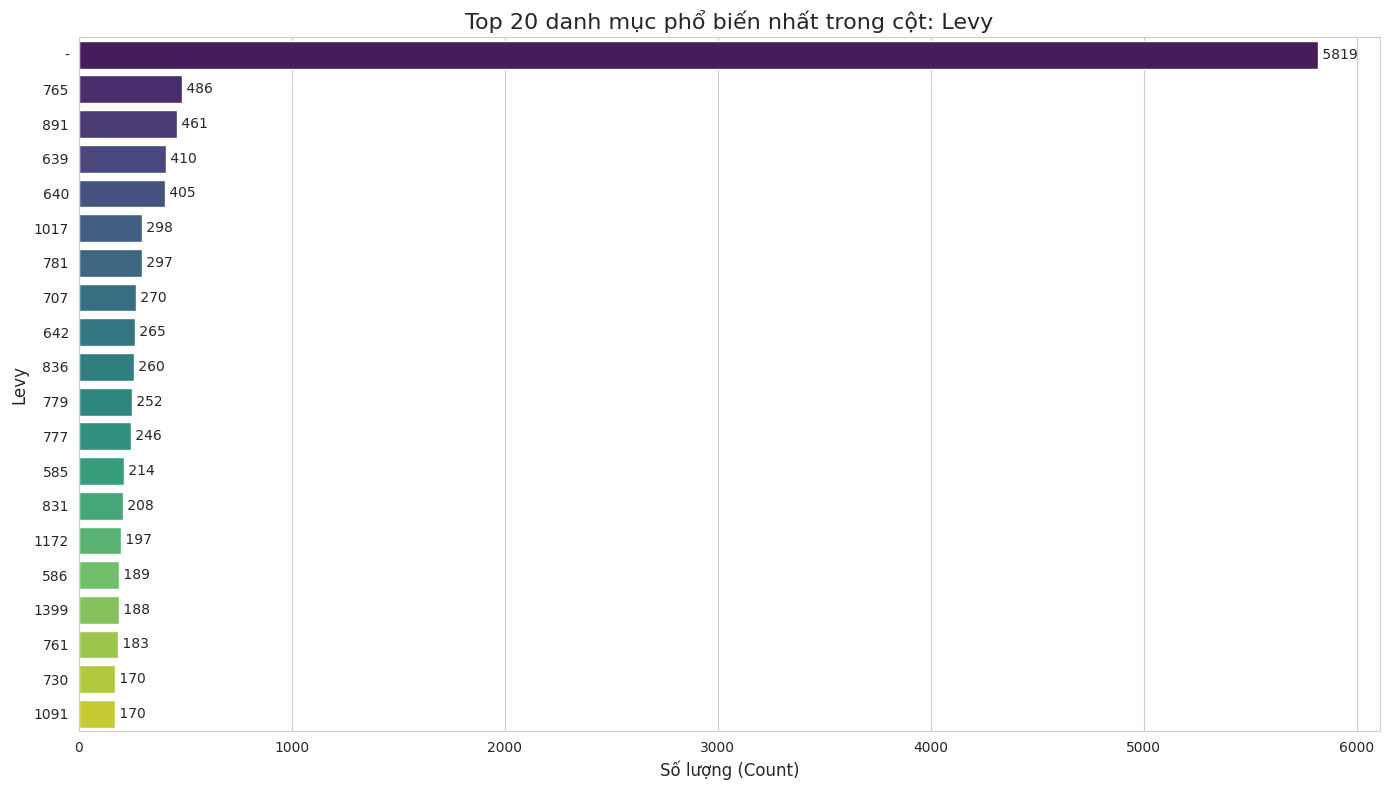

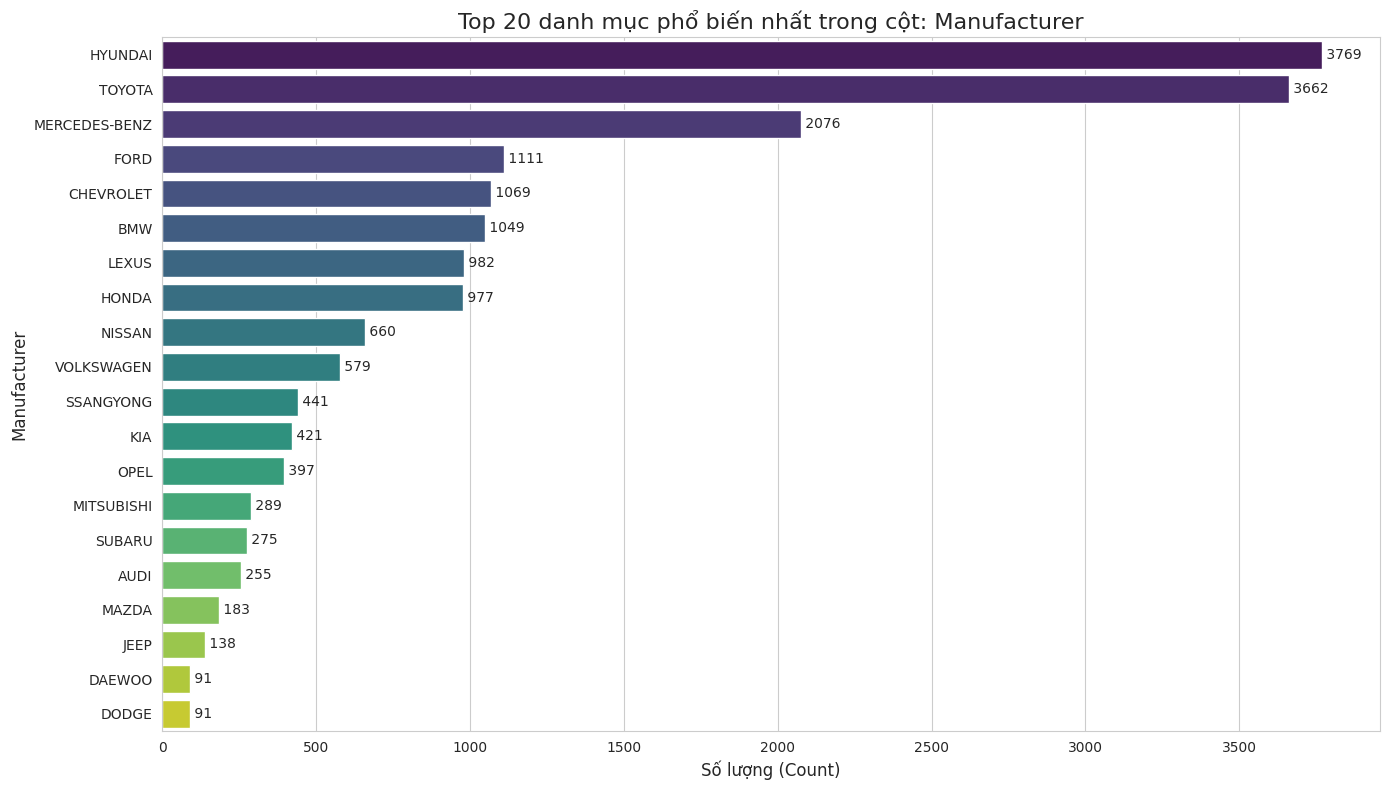

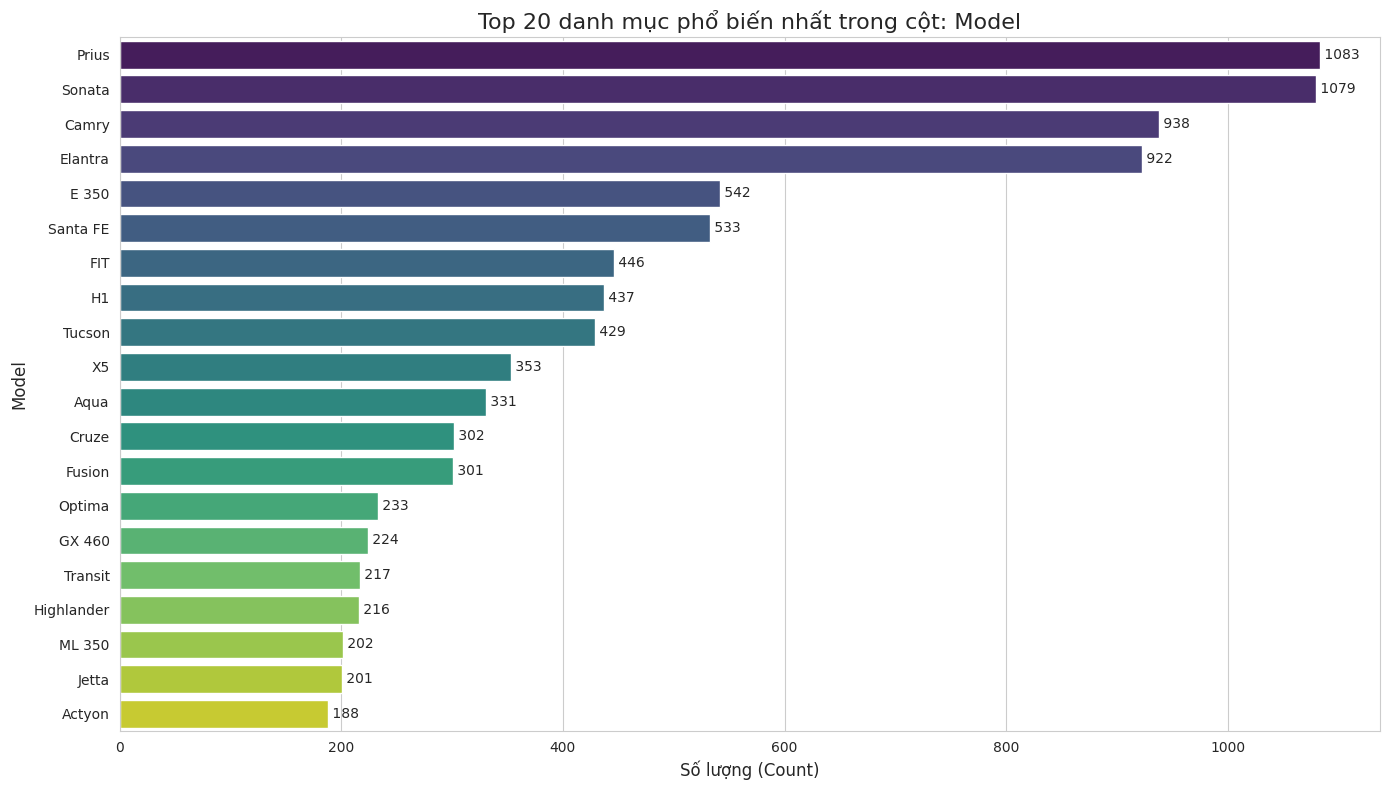

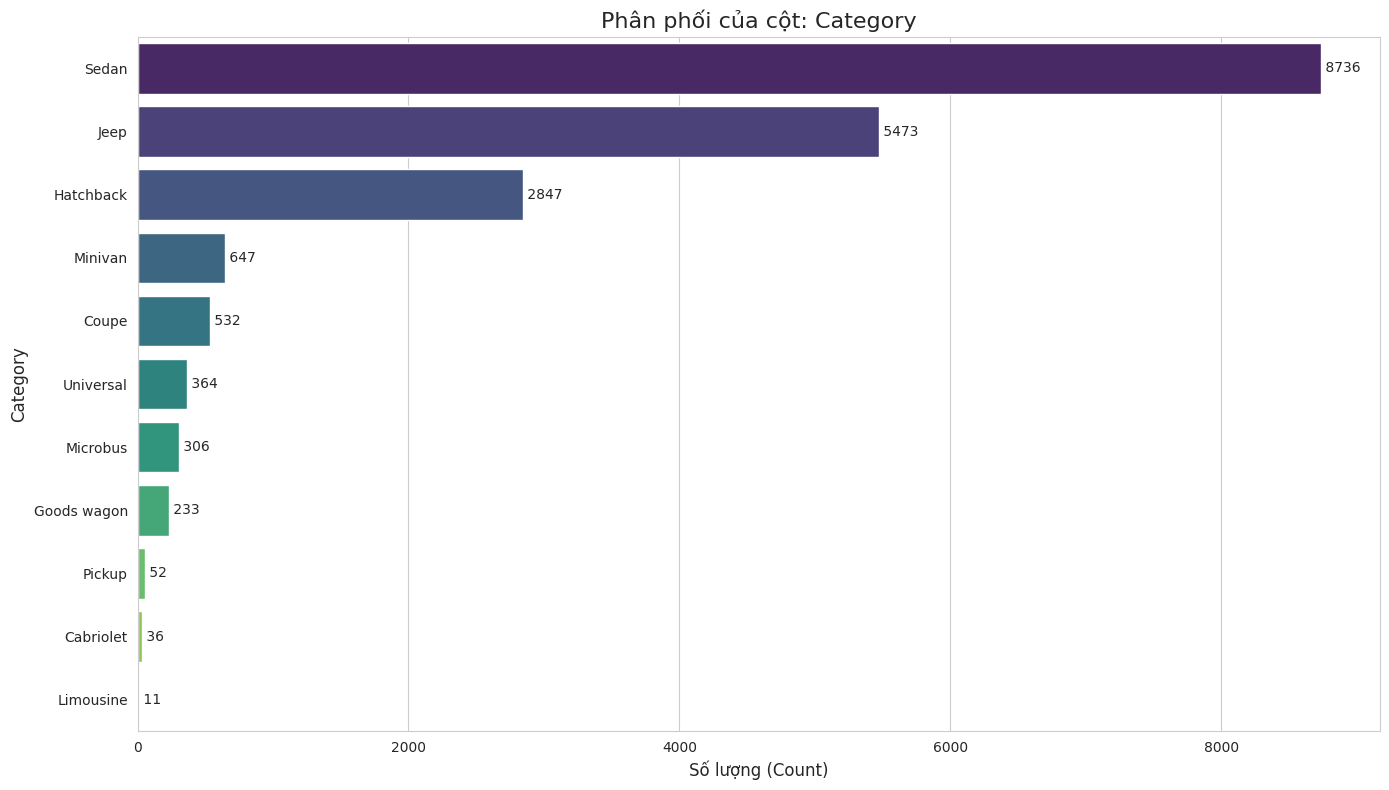

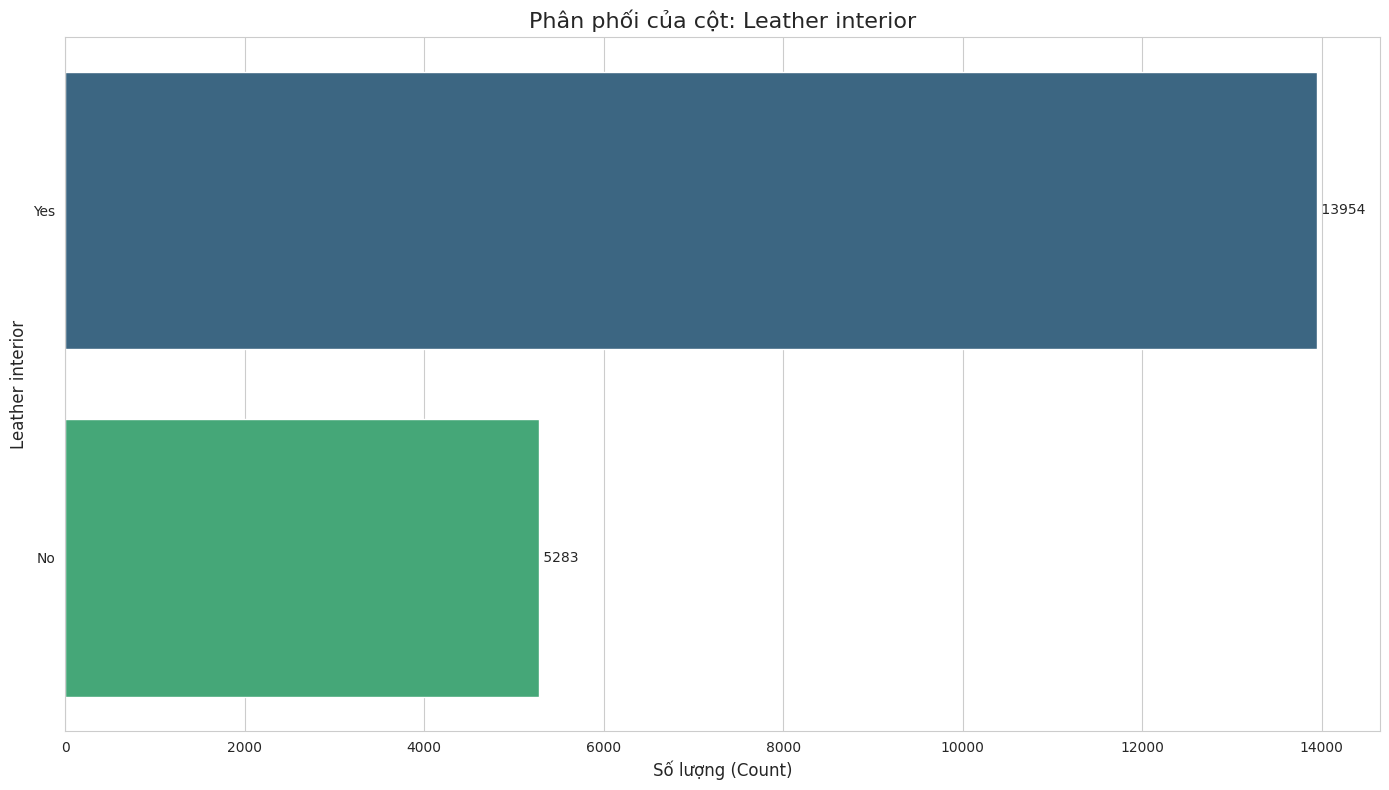

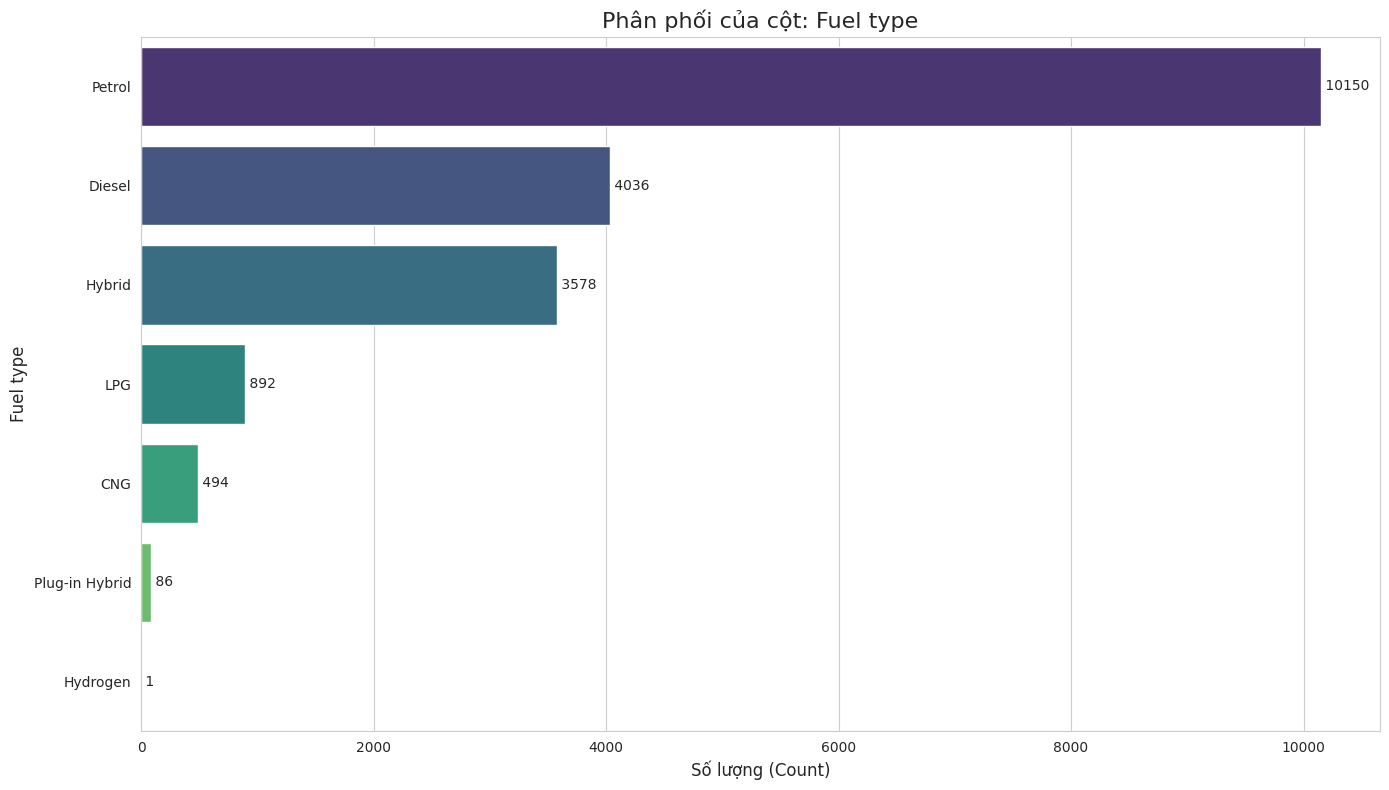

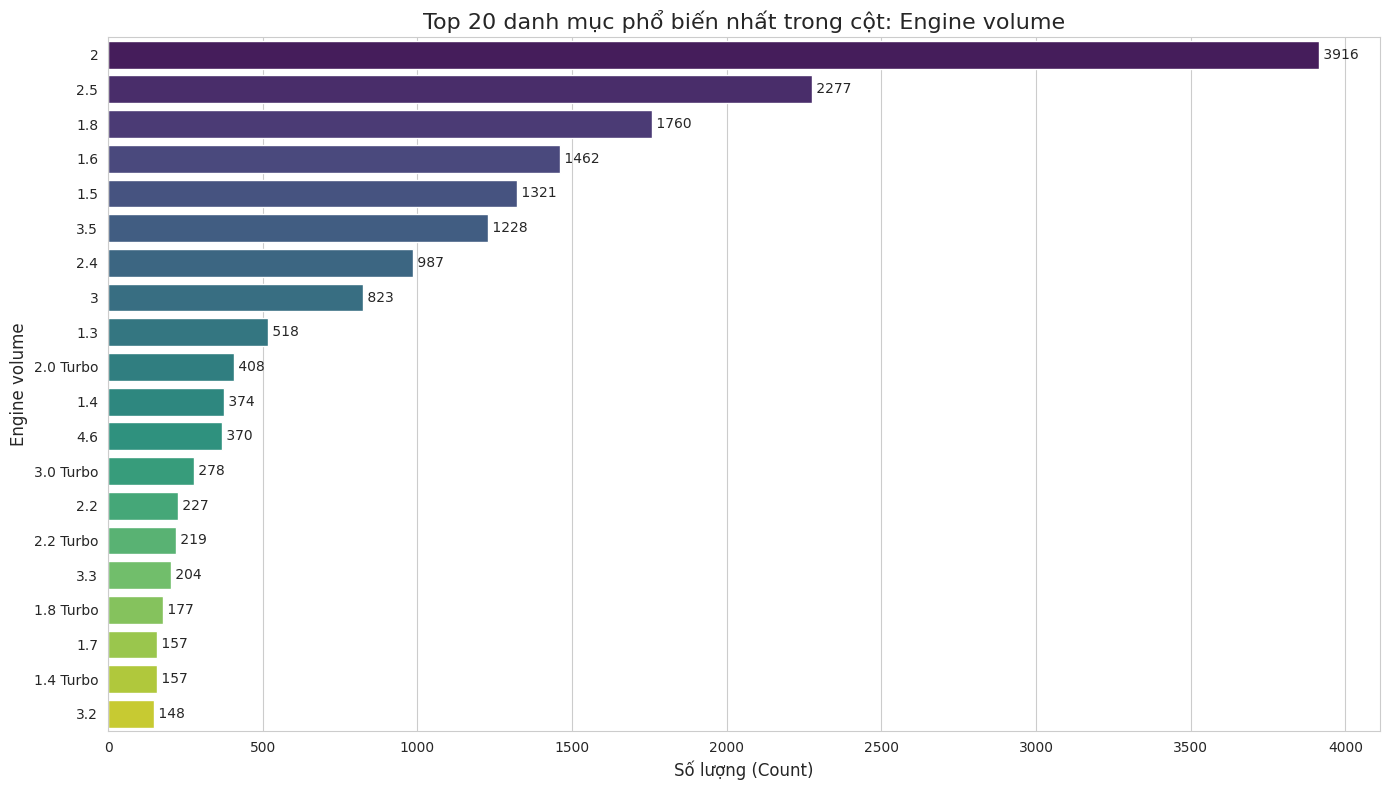

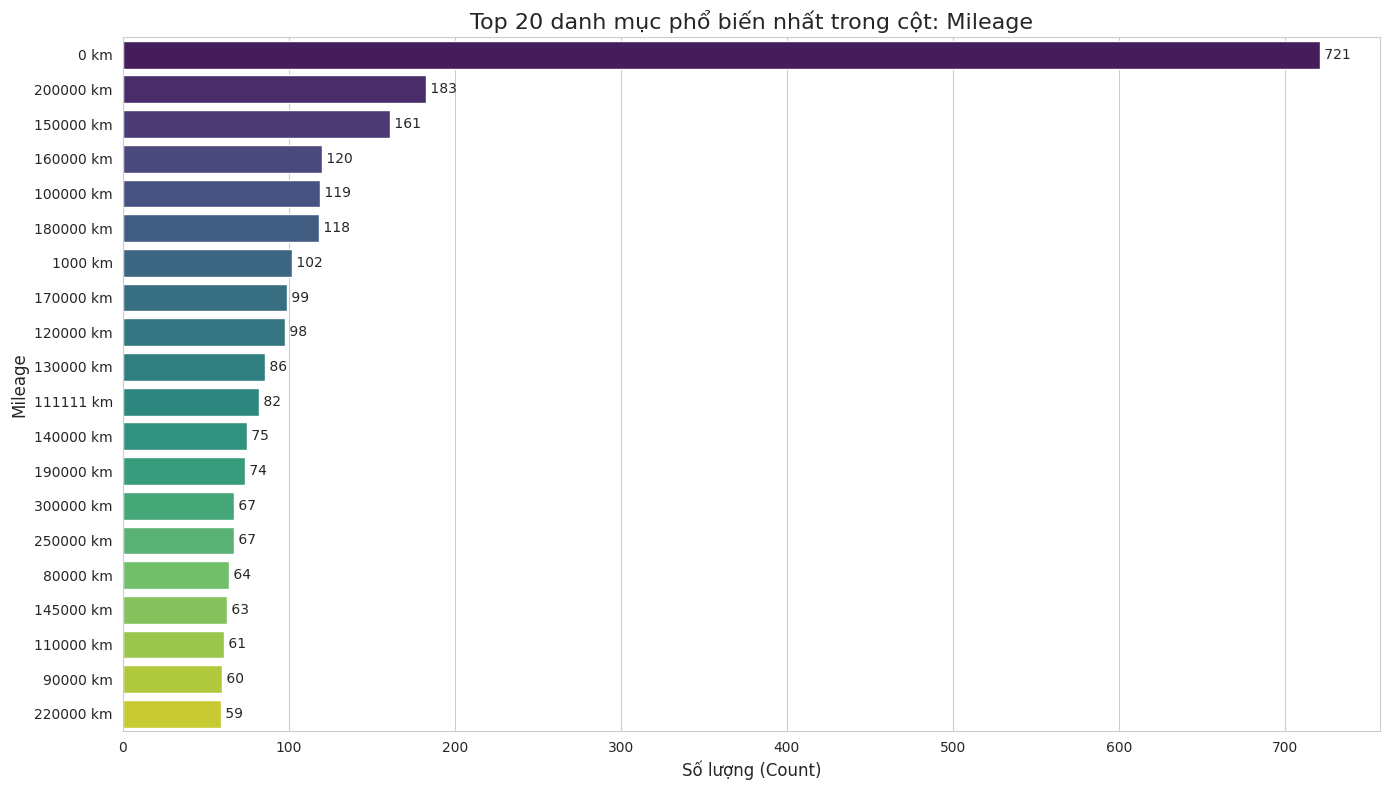

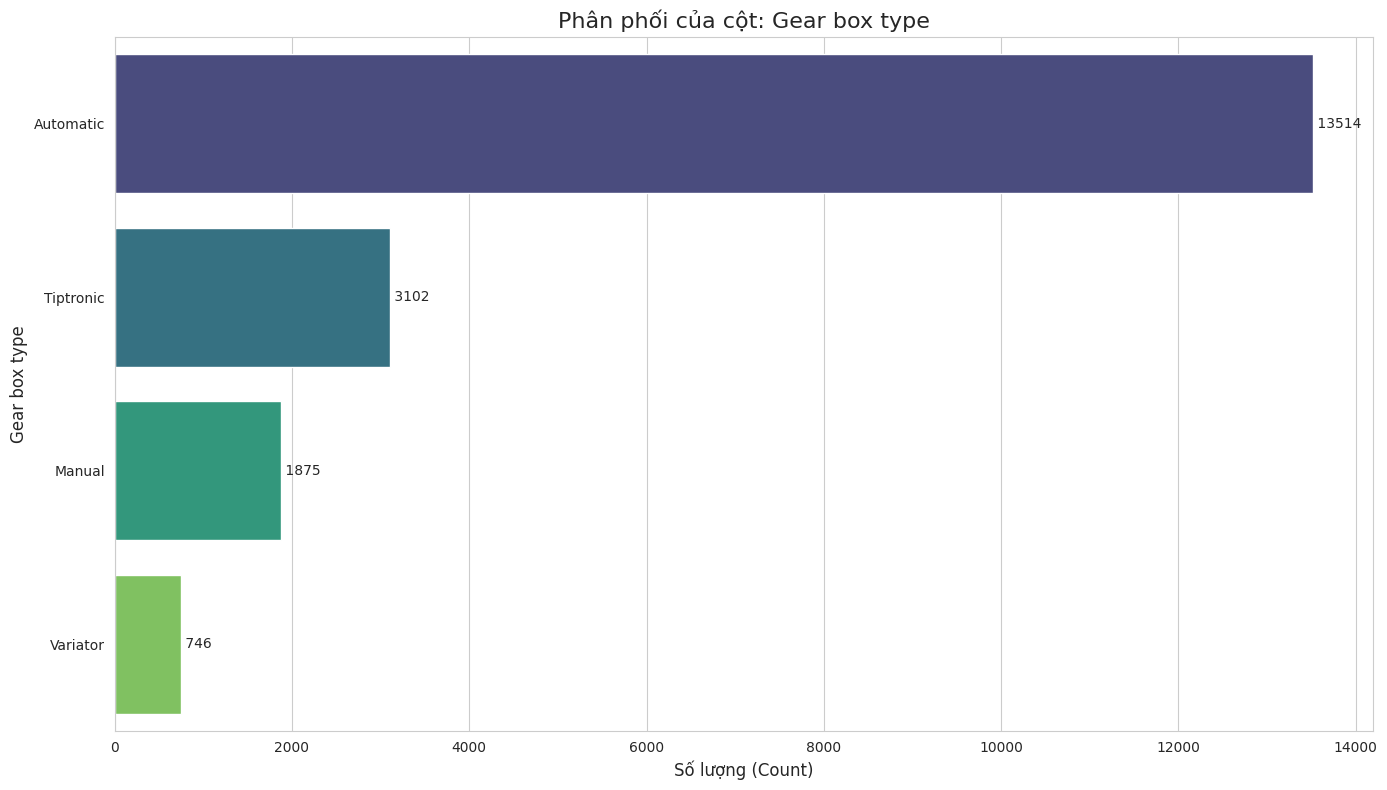

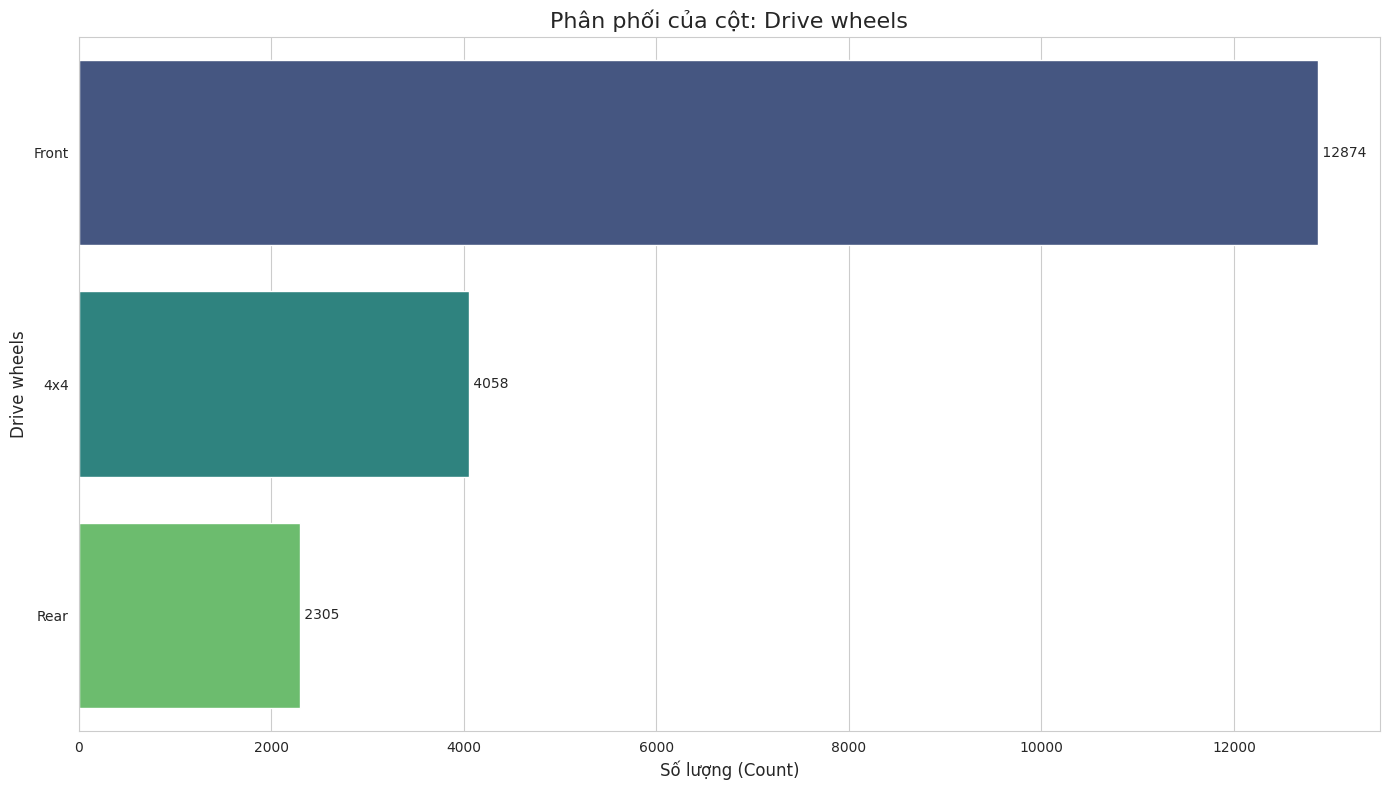

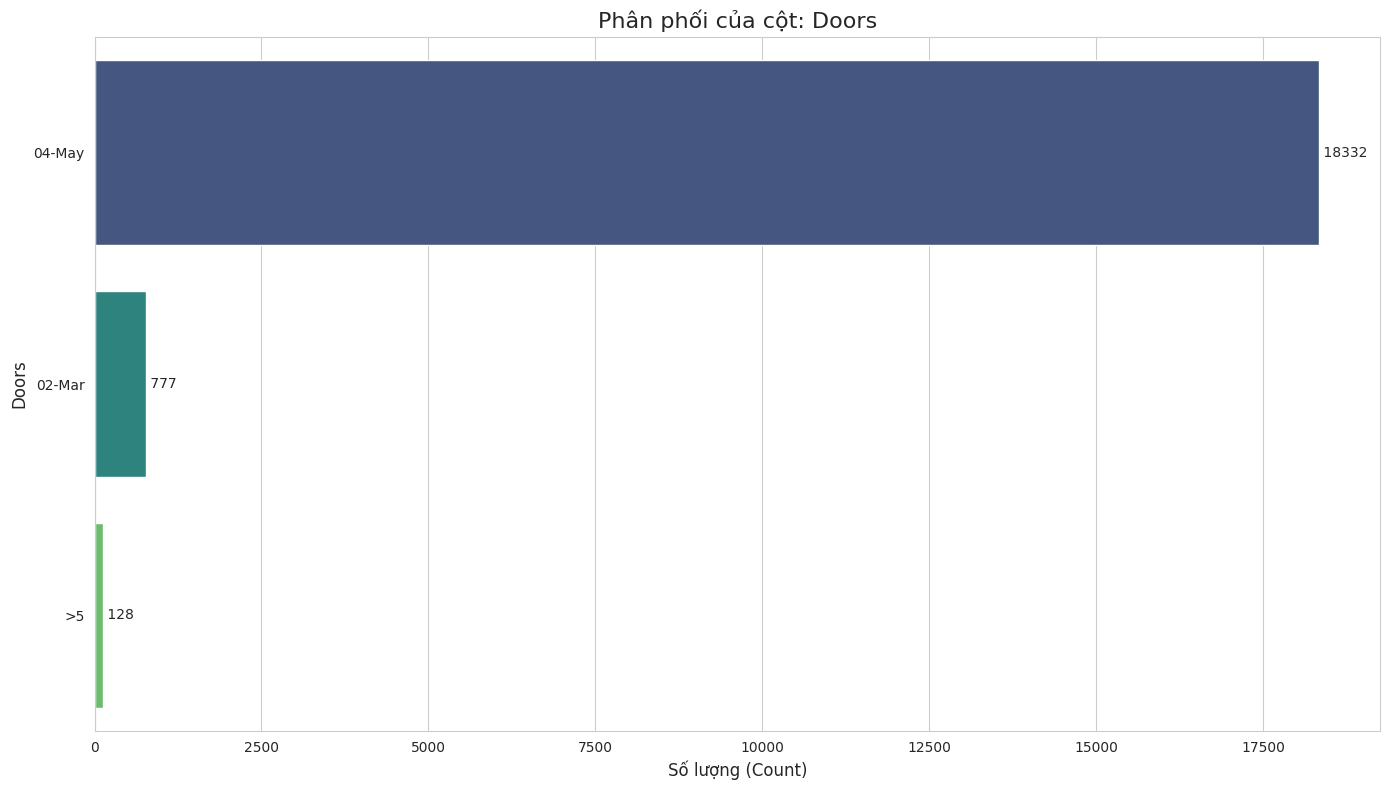

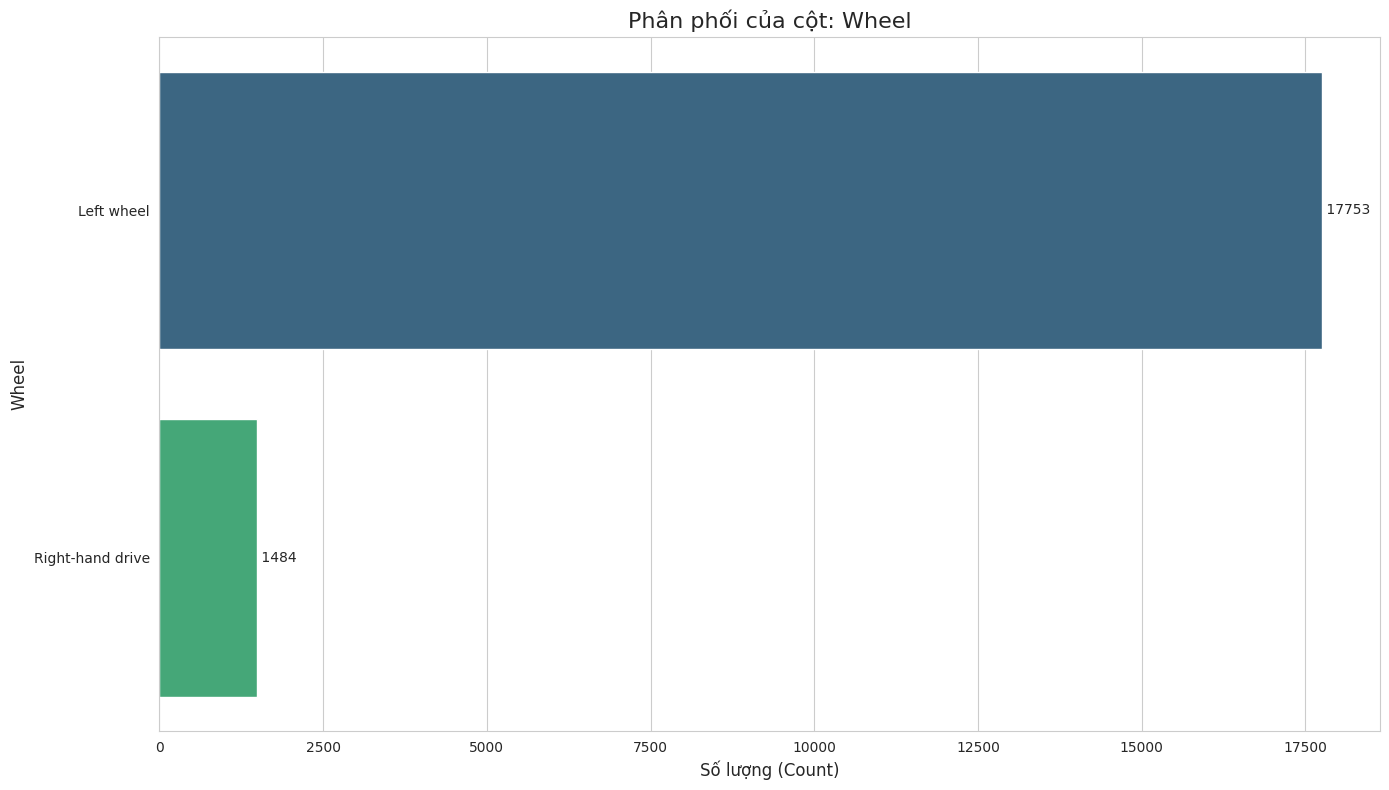

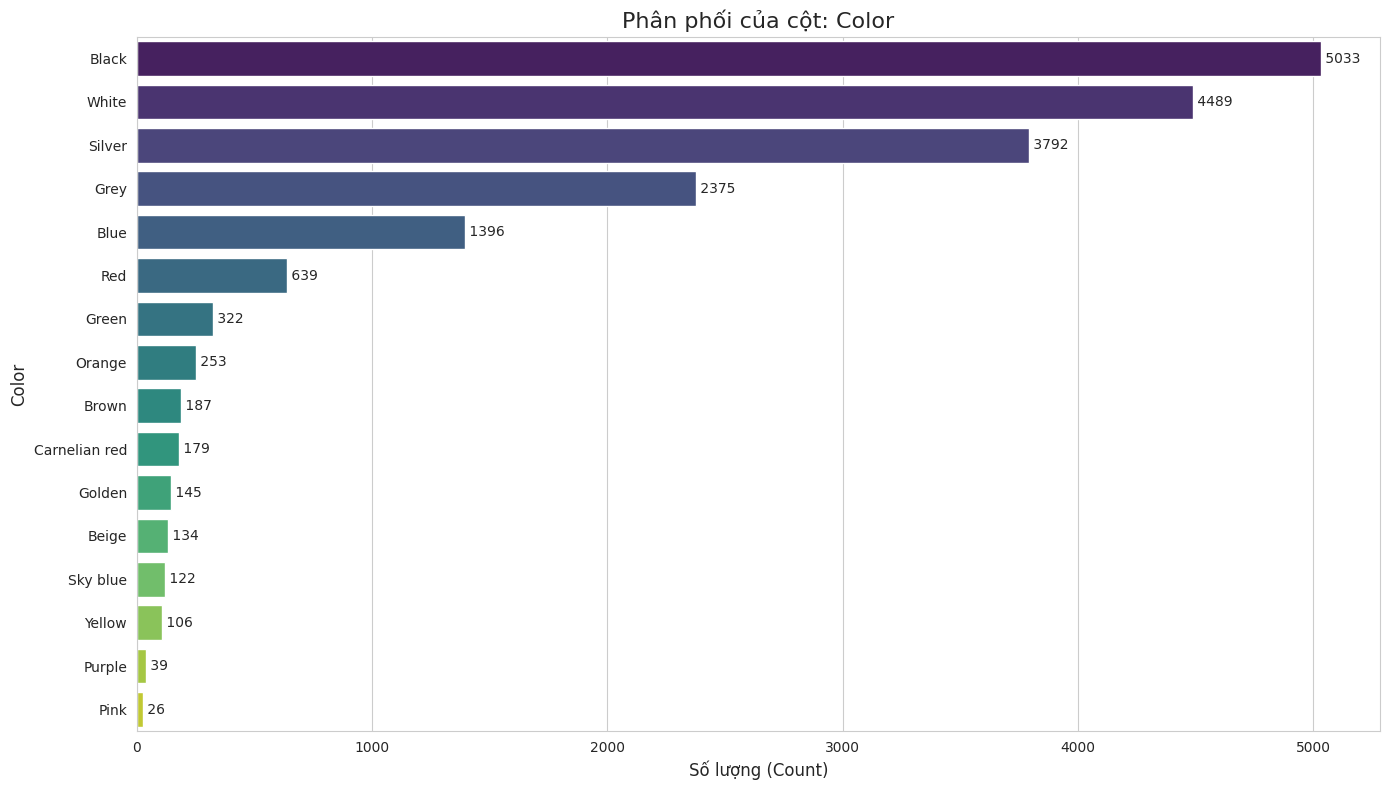

In [7]:
# Lấy danh sách các cột dạng phân loại
categorical_cols = df.select_dtypes(include=['object']).columns

print("\n--- Phân phối của các biến phân loại ---")

# Lặp qua từng cột phân loại để vẽ biểu đồ
for col in categorical_cols:
    plt.figure(figsize=(14, 8))

    value_counts = df[col].value_counts()

    if len(value_counts) > 20:
        value_counts = value_counts.nlargest(20)
        title = f'Top 20 danh mục phổ biến nhất trong cột: {col}'
    else:
        title = f'Phân phối của cột: {col}'

    # --- PHẦN CẬP NHẬT ĐỂ SỬA WARNING ---
    # Thêm hue=value_counts.index và legend=False
    ax = sns.barplot(
        x=value_counts.values,
        y=value_counts.index,
        hue=value_counts.index, # Gán biến y cho hue
        palette='viridis',
        legend=False # Tắt chú thích không cần thiết
    )

    plt.title(title, fontsize=16)
    plt.xlabel('Số lượng (Count)', fontsize=12)
    plt.ylabel(col, fontsize=12)

    # Thêm nhãn số lượng vào cuối mỗi thanh
    for index, value in enumerate(value_counts):
        ax.text(value, index, f' {value}', va='center', fontsize=10)

    plt.tight_layout()
    plt.show()

## **3. Tiền xử lí (Data Preprocessing)**